<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (CO<sub>2</sub> emission data)

In the dataset, the CO<sub>2</sub> emission for various regions in the world is given. Our objective is to group the regions based on the factors affecting the environment in terms of the greenhouse gases, where CO<sub>2</sub> is a primary greenhouse gas. 

Many developing and developed countries in the world are contributing to the CO<sub>2</sub> emission in the environment. It is interesting to know that the increase in atmospheric carbon dioxide is responsible for about two-thirds of the total energy imbalance that is causing Earth's temperature to rise and leads to global warming.

**Region**: Region of the country

**CO2 Emission**: Annual CO<sub>2</sub> emission (in tonnes)

**Ease of Business**: The ease of business in the country

**Energy Usage**: Energy used by the country in various forms

**GDP**: GDP of a country

**Internet Usage**: Usage of the internet 

**Population total**: Total population of a country

## Table of Content

1. **[Exploratory Data Analysis](#lib)**
2. **[Hierarchical Clustering](#hie)**
3. **[DBSCAN](#DBSCAN)**

#### Import the required libraries

In [1]:
# write your code here
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# write your code here
df1 = pd.read_csv('CO2_emission_data.csv')
df1.head()

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5.652325e+09,0.010,3033659
1,Europe,4166,151,2172,7.464447e+09,0.024,3014579
2,Europe,4254,151,2172,8.376484e+09,0.060,2992724
3,Europe,3865,151,2068,9.132562e+09,0.096,2968028
4,Europe,4056,151,2025,1.070101e+10,0.150,2940880



### Let's begin with some hands-on practice exercises

<a id="lib"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify the different regions to which the countries belong and visualize the count of countries.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# write your code here
df1['Region'].value_counts()

Europe          302
The Americas    289
Africa          254
Asia            244
Middle East      92
Oceania          62
Name: Region, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype, dimension and summary statistics of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# write your code here
df1.dtypes

Region               object
CO2 Emissions         int64
Ease of Business      int64
Energy Usage          int64
GDP                 float64
Internet Usage      float64
Population Total      int64
dtype: object

In [5]:
df1.shape

(1243, 7)

In [6]:
df1.describe()

,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
count,1.243000e+03,1243.000000,1.243000e+03,1.243000e+03,1236.000000,1.243000e+03
mean,1.897666e+05,88.279968,7.541842e+04,3.535548e+11,0.329983,4.513494e+07
std,7.697027e+05,52.770388,2.707586e+05,1.358970e+12,1.634042,1.600483e+08
min,4.800000e+01,1.000000,3.000000e+01,1.232585e+08,0.000000,6.966000e+04
25%,3.111500e+03,45.000000,2.721000e+03,7.746581e+09,0.062000,2.097088e+06
50%,1.620800e+04,85.000000,9.318000e+03,2.468037e+10,0.200500,7.739900e+06
75%,7.581200e+04,131.000000,3.495650e+04,1.770000e+11,0.460000,2.884664e+07
max,8.286892e+06,186.000000,2.727728e+06,1.620000e+13,57.000000,1.350695e+09


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Drop the variables 'Region', 'Ease of Business', 'Internet Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# write your code here
df1 = df1.drop(['Region','Ease of Business', 'Internet Usage'], axis=1)

In [8]:
df1.head()

,CO2 Emissions,Energy Usage,GDP,Population Total
0,4294,1976,5.652325e+09,3033659
1,4166,2172,7.464447e+09,3014579
2,4254,2172,8.376484e+09,2992724
3,3865,2068,9.132562e+09,2968028
4,4056,2025,1.070101e+10,2940880


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if there are missing values, if yes then remove the observations with missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# write your code here
df1.isnull().sum()

CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

There are no missing values in tha data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Check if there are outliers in the data and visualize the outliers using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

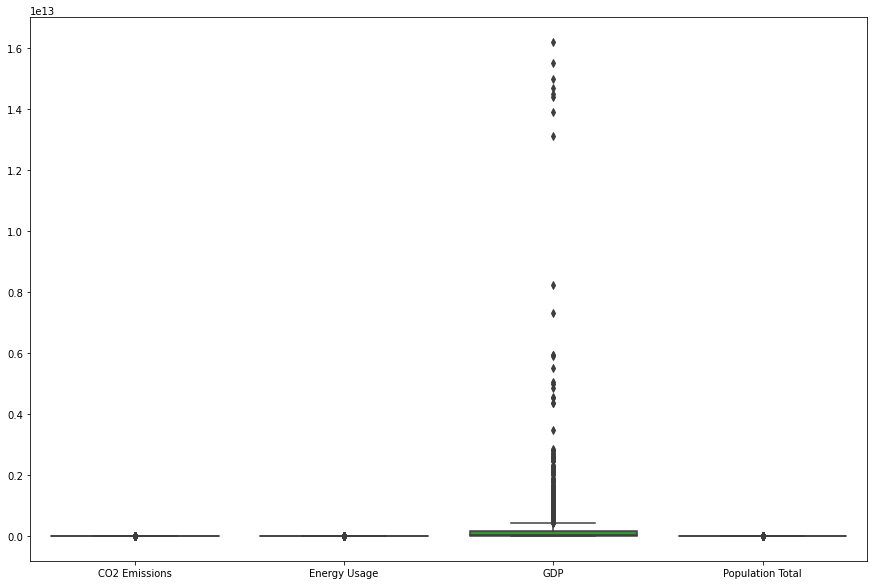

In [10]:
# write your code here
plt.figure(figsize=(15,10))
sns.boxplot(data = df1)
plt.show()

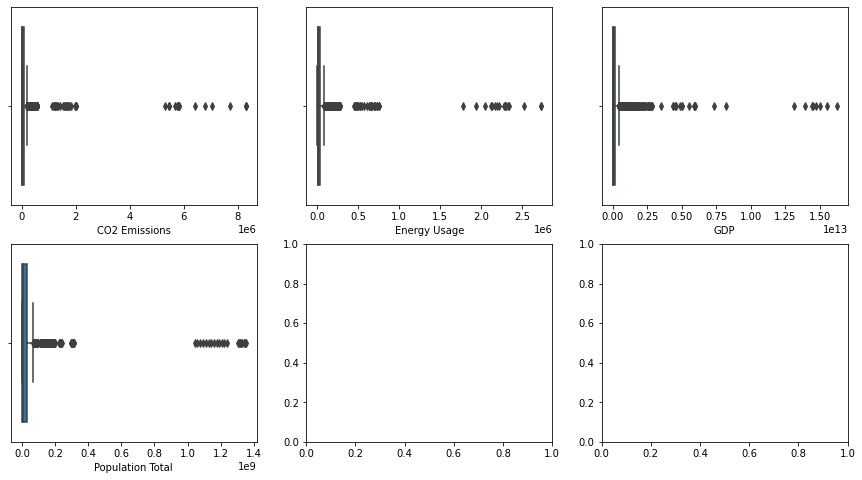

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df1.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df1[variable], ax = subplot)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using 3.5IQR and check the shape of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# write your code here
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df2 = df1[~((df1 < (Q1 - 3.5 * IQR)) | (df1 > (Q3 + 3.5 * IQR))).any(axis=1)]

In [13]:
df2.shape

(1054, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Visualize the data obtained after removing the outliers with the help of a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

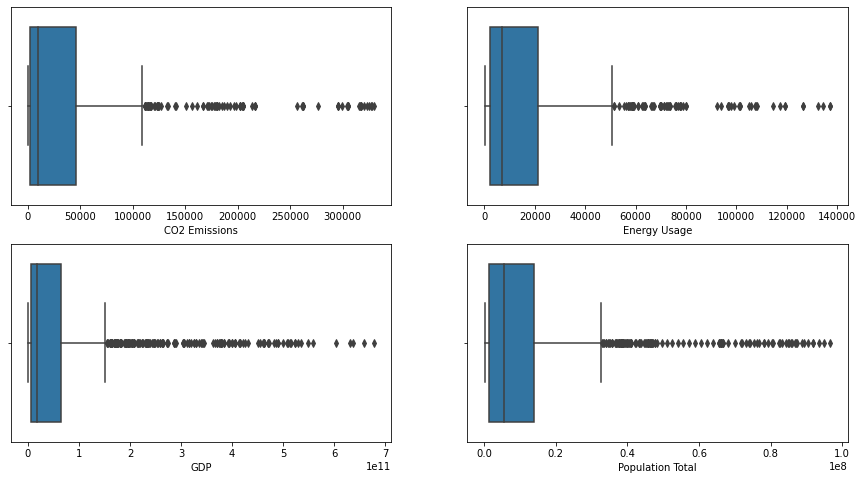

In [29]:
# write your code here
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df2.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df2[variable], ax = subplot)

# display the plot
plt.show()

By observing the range of the boxplot, we can say that the extreme outliers are removed from the original data.

The new outliers are the moderate outliers that lies between the min/ max range before removing actual outliers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables in the standard form such that they will have mean 0 and standard deviation 1 and get the summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# write your code here
df2_feature = df2[['CO2 Emissions','Energy Usage','GDP','Population Total']]
ss = StandardScaler()
df2_feature_scaled = ss.fit_transform(df2_feature)
df2_scaled = pd.DataFrame(df2_feature_scaled, columns = df2.columns)

In [33]:
round(df2_scaled.describe())

,CO2 Emissions,Energy Usage,GDP,Population Total
count,1054.0,1054.0,1054.0,1054.0
mean,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0
75%,0.0,0.0,-0.0,0.0
max,5.0,5.0,5.0,5.0


<a id="hie"></a>
## 2. Hierarchical Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the 'ward' linkage method and print the first 10 observations of the linkage matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# write your code here
link_mat = linkage(df2_scaled, method='ward')
print(link_mat[0:10])

[[380.         382.           0.00002257   2.        ]
 [391.         392.           0.00003782   2.        ]
 [381.         383.           0.0000863    2.        ]
 [ 36.          37.           0.00008787   2.        ]
 [ 26.          27.           0.00010737   2.        ]
 [495.         496.           0.00011967   2.        ]
 [384.         385.           0.00012006   2.        ]
 [816.         818.           0.00014106   2.        ]
 [960.         961.           0.00014553   2.        ]
 [389.         390.           0.00014886   2.        ]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the clusters obtained using dendrogram and find the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

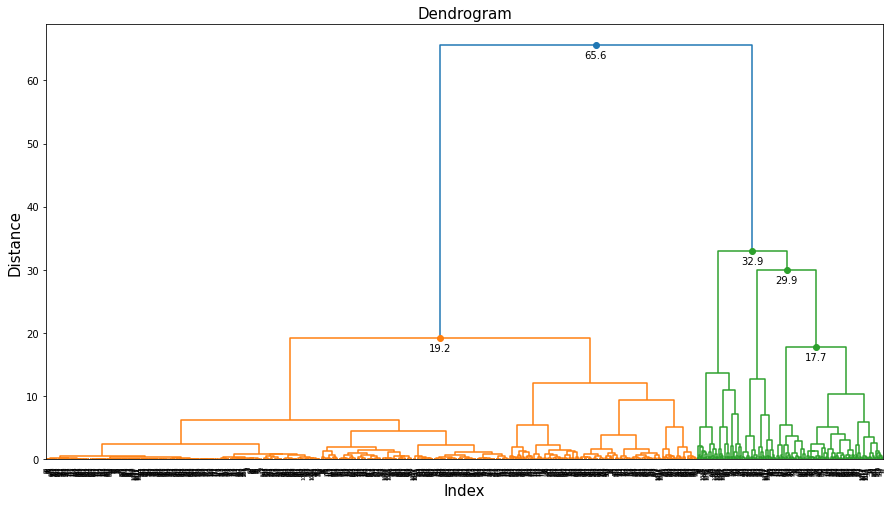

In [35]:
# write your code here
plt.figure(figsize = (15,8))
dendro = dendrogram(link_mat)
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > 15:
        plt.plot(x, y , 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

plt.axhline(y = 100)

plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the cophenetic correlation coefficient and interpret it.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# write your code here
eucli_dist = euclidean_distances(df2_scaled)

dist_array = eucli_dist[np.triu_indices(1054, k = 1)]

coeff, cophenet_dist = cophenet(link_mat, dist_array)

print(coeff)

0.7973822617121825


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Instantiate clustering method with an optimal number of clusters and 'ward' linkage method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# write your code here
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

clusters.fit(df2_scaled)

AgglomerativeClustering()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Obtain the cluster labels and add a column containing the cluster number to the original data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# write your code here
df2['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df2.head()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
0,4294,1976,5.652325e+09,3033659,1
1,4166,2172,7.464447e+09,3014579,1
2,4254,2172,8.376484e+09,2992724,1
3,3865,2068,9.132562e+09,2968028,1
4,4056,2025,1.070101e+10,2940880,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# write your code here
df2['Cluster'].value_counts()

1    820
0    234
Name: Cluster, dtype: int64

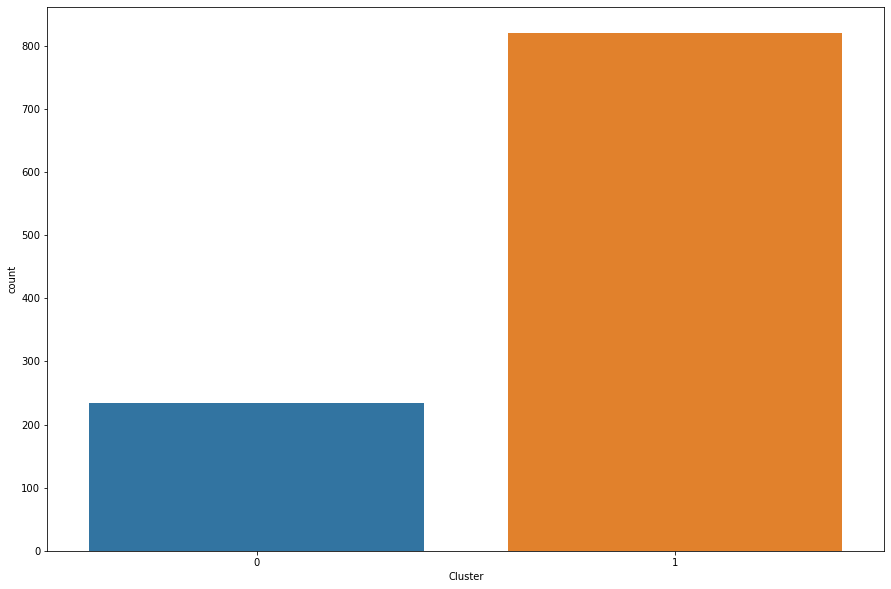

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(data = df2, x = 'Cluster')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Plot the scatterplot to visualize the clusters using 'CO2 Emissions' and 'Energy Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

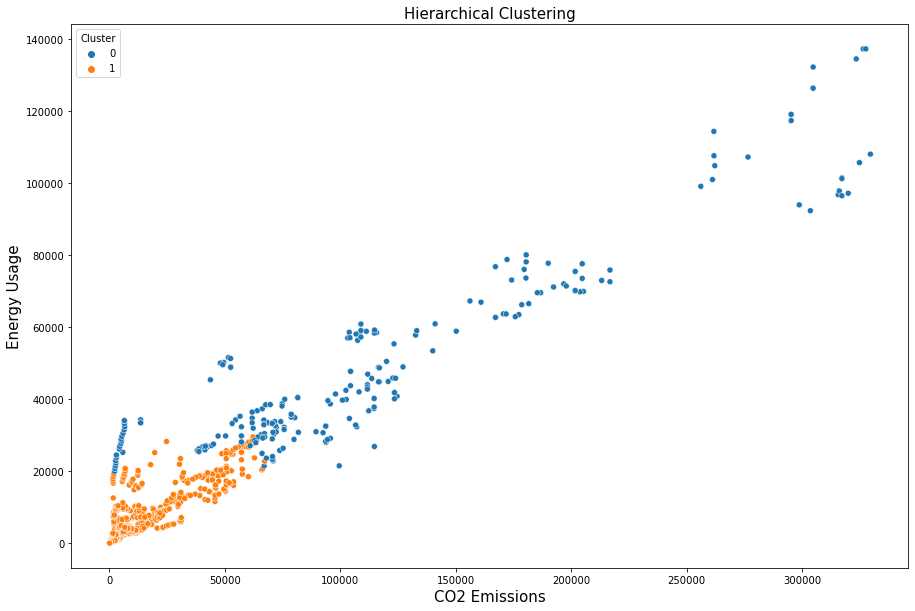

In [43]:
# write your code here
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'CO2 Emissions', y = 'Energy Usage', data = df2, hue = 'Cluster')

plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('CO2 Emissions', fontsize = 15)
plt.ylabel('Energy Usage', fontsize = 15)

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Obtain the first 10 observations for 1st cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# write your code here
df2[df2.Cluster == 0].head(10)

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
8,92533,30698,6.786383e+10,33003442,0
9,89493,30974,8.532500e+10,33461345,0
10,107128,32335,1.030000e+11,33960903,0
11,103963,34658,1.170000e+11,34507214,0
12,112339,36793,1.350000e+11,35097043,0
13,114619,37425,1.710000e+11,35725377,0
14,124586,40823,1.370000e+11,36383302,0
15,123475,40105,1.610000e+11,37062820,0
16,123475,41852,1.990000e+11,37762962,0
17,123475,41852,2.040000e+11,38481705,0


In [45]:
df2[df2.Cluster == 0].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
count,234.000000,234.000000,2.340000e+02,2.340000e+02,234.0
mean,114965.598291,49870.944444,2.367197e+11,3.243600e+07,0.0
std,83140.404911,26678.211790,1.530802e+11,2.677078e+07,0.0
min,2226.000000,19971.000000,7.707035e+09,1.359114e+06,0.0
25%,63767.500000,30598.250000,1.300000e+11,9.097402e+06,0.0
50%,95160.500000,39972.500000,2.050000e+11,2.751649e+07,0.0
75%,159756.500000,62885.750000,3.415000e+11,4.585367e+07,0.0
max,329605.000000,137343.000000,6.780000e+11,9.670676e+07,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the first 10 observations for the 2nd cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# write your code here
df2[df2.Cluster == 1].head(10)

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
0,4294,1976,5.652325e+09,3033659,1
1,4166,2172,7.464447e+09,3014579,1
2,4254,2172,8.376484e+09,2992724,1
3,3865,2068,9.132562e+09,2968028,1
4,4056,2025,1.070101e+10,2940880,1
5,4129,2061,1.288135e+10,2912559,1
6,3880,2068,1.204421e+10,2884303,1
7,4283,2059,1.192695e+10,2856673,1
18,9065,9004,1.418895e+10,15421075,1
19,18793,9676,1.964086e+10,15976715,1


In [47]:
df2[df2.Cluster == 1].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
count,820.000000,820.000000,8.200000e+02,8.200000e+02,820.0
mean,12706.826829,6355.904878,2.261635e+10,6.981027e+06,1.0
std,15888.052856,6865.604551,3.244548e+10,9.259193e+06,0.0
min,48.000000,30.000000,1.232585e+08,6.966000e+04,1.0
25%,1503.000000,758.500000,3.407603e+09,7.656738e+05,1.0
50%,5865.500000,3917.000000,1.147868e+10,3.684119e+06,1.0
75%,18806.000000,9156.250000,2.614448e+10,9.407482e+06,1.0
max,67242.000000,29501.000000,2.030000e+11,5.248729e+07,1.0


<a id="DBSCAN"></a>
## 3. DBSCAN

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Perform DBSCAN for the data given using 0.7 as epsilon and 9 minimum samples. Display the unique number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# write your code here
model = DBSCAN(eps = 0.7, min_samples = 9)

# fit the model on the scaled data
model.fit(df2_scaled)

DBSCAN(eps=0.7, min_samples=9)

In [50]:
(set(model.labels_))

{-1, 0, 1}

The DBSCAN algorithm forms 2 clusters where 0 and 1 are the cluster labels and the outliers are represented by -1.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check for the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# write your code here
df2['Cluster_DBSCAN'] = model.labels_
df2['Cluster_DBSCAN'].value_counts()

 0    953
-1     92
 1      9
Name: Cluster_DBSCAN, dtype: int64

The maximum number of observations is in the 1st cluster.

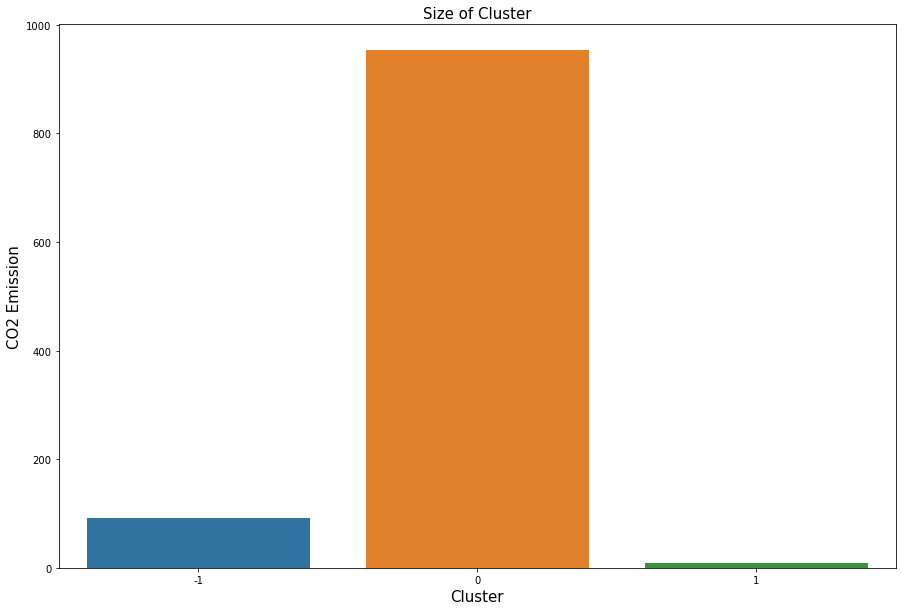

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(data = df2, x = 'Cluster_DBSCAN')


plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('CO2 Emission', fontsize = 15)

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Describe the outliers identified by the DBSCAN algorithm in the previous question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# write your code here
outliers = df2[df2.Cluster_DBSCAN == -1]
outliers.index.value_counts().sum()

92

In [55]:
outliers.describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster,Cluster_DBSCAN
count,92.000000,92.000000,9.200000e+01,9.200000e+01,92.0,92.0
mean,174416.717391,70841.358696,3.091656e+11,4.643370e+07,0.0,-1.0
std,91331.691829,29678.904804,1.569702e+11,2.634551e+07,0.0,0.0
min,38757.000000,25375.000000,5.763326e+10,7.824909e+06,0.0,-1.0
25%,101327.500000,48957.250000,1.755000e+11,2.897220e+07,0.0,-1.0
50%,173233.000000,69597.000000,3.045000e+11,4.090783e+07,0.0,-1.0
75%,261361.500000,94637.250000,4.175000e+11,6.662850e+07,0.0,-1.0
max,329605.000000,137343.000000,6.780000e+11,9.670676e+07,0.0,-1.0
